# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Rifky Galuh Yuliawan
- Email: rfqgal@gmail.com
- ID Dicoding: rfqgal

## Persiapan

### Menyiapkan Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle
import sklearn
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


### Menyiapkan Data

### Data Understanding

In [ ]:
dataset_url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv'

df = pd.read_csv(dataset_url, sep=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


#### **Memahami Struktur Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [ ]:
df.shape

(4424, 37)

#### **Identifikasi Missing & Duplicated Values**

In [ ]:
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [ ]:
df.duplicated().sum()

np.int64(0)

Tidak ditemukan adanya missing values ataupun duplicated pada dataset

### Data Preparation / Preprocessing

#### **Menyesuaikan Tipe Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [ ]:
df = df.rename(columns={'Nacionality': 'Nationality'})

In [ ]:
df['Marital_status'] = df['Marital_status'].astype('object')
df['Application_mode'] = df['Application_mode'].astype('object')
df['Application_order'] = df['Application_order'].astype('object')
df['Course'] = df['Course'].astype('object')
df['Daytime_evening_attendance'] = df['Daytime_evening_attendance'].astype('object')
df['Previous_qualification'] = df['Previous_qualification'].astype('object')
df['Nationality'] = df['Nationality'].astype('object')
df['Mothers_qualification'] = df['Mothers_qualification'].astype('object')
df['Mothers_occupation'] = df['Mothers_occupation'].astype('object')
df['Fathers_qualification'] = df['Fathers_qualification'].astype('object')
df['Fathers_occupation'] = df['Fathers_occupation'].astype('object')
df['Displaced'] = df['Displaced'].astype('object')
df['Educational_special_needs'] = df['Educational_special_needs'].astype('object')
df['Debtor'] = df['Debtor'].astype('object')
df['Tuition_fees_up_to_date'] = df['Tuition_fees_up_to_date'].astype('object')
df['Scholarship_holder'] = df['Scholarship_holder'].astype('object')
df['Gender'] = df['Gender'].astype('object')
df['International'] = df['International'].astype('object')
df['Status'] = df['Status'].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   object 
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nationality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4424 non-null   o

#### **Membuang Fitur yang Tidak Relevan**

In [ ]:
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nationality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.0,4424.0,4424.0,4424.0,4424.0,4424.0,4424.000000,4424.0,4424.0,4424.0,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,6.0,18.0,8.0,17.0,2.0,17.0,NaN,21.0,29.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,1.0,1.0,1.0,9500.0,1.0,1.0,NaN,1.0,1.0,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,3919.0,1708.0,3026.0,766.0,3941.0,3717.0,NaN,4314.0,1069.0,1209.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,NaN,NaN,NaN,NaN,NaN,NaN,132.613314,NaN,NaN,NaN,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,13.188332,NaN,NaN,NaN,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,125.000000,NaN,NaN,NaN,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,133.100000,NaN,NaN,NaN,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,140.000000,NaN,NaN,NaN,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


Kolom Curricular_units_1st_sem_grade dan Curricular_units_2nd_sem_grade memiliki nilai yang aneh sehingga kolom ini akan dihapus

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean = df_clean.drop(columns=['Curricular_units_1st_sem_grade','Curricular_units_2nd_sem_grade'])

#### **Analisis Distribusi dan Korelasi**

In [ ]:
numerical_features = df_clean.select_dtypes(include=['number'])
categorical_features = df_clean.select_dtypes(include=['object'])

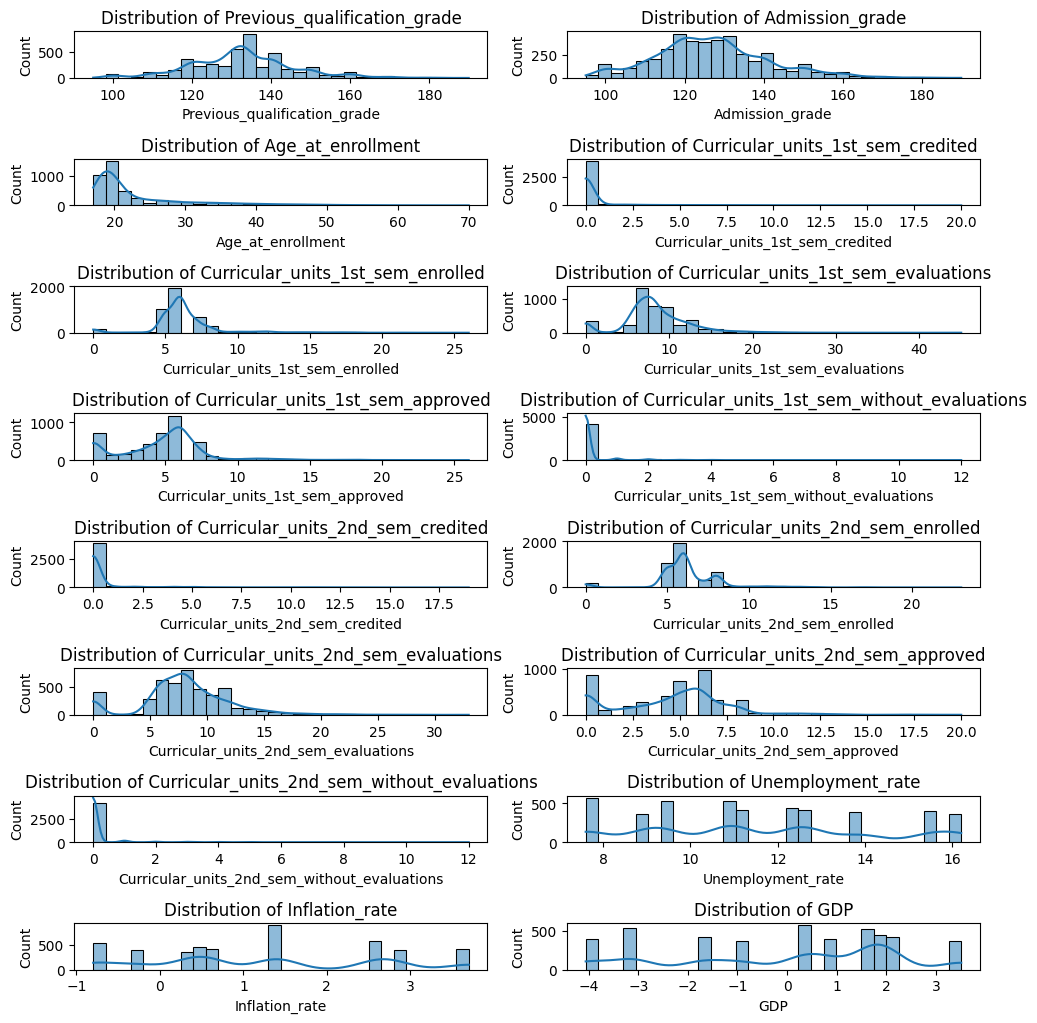

In [ ]:
# Distribusi Fitur Numerik
plt.figure(figsize=(10, 15))
for i, column in enumerate(numerical_features.columns, 1):
    plt.subplot(12, 2, i)
    sns.histplot(df_clean[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()

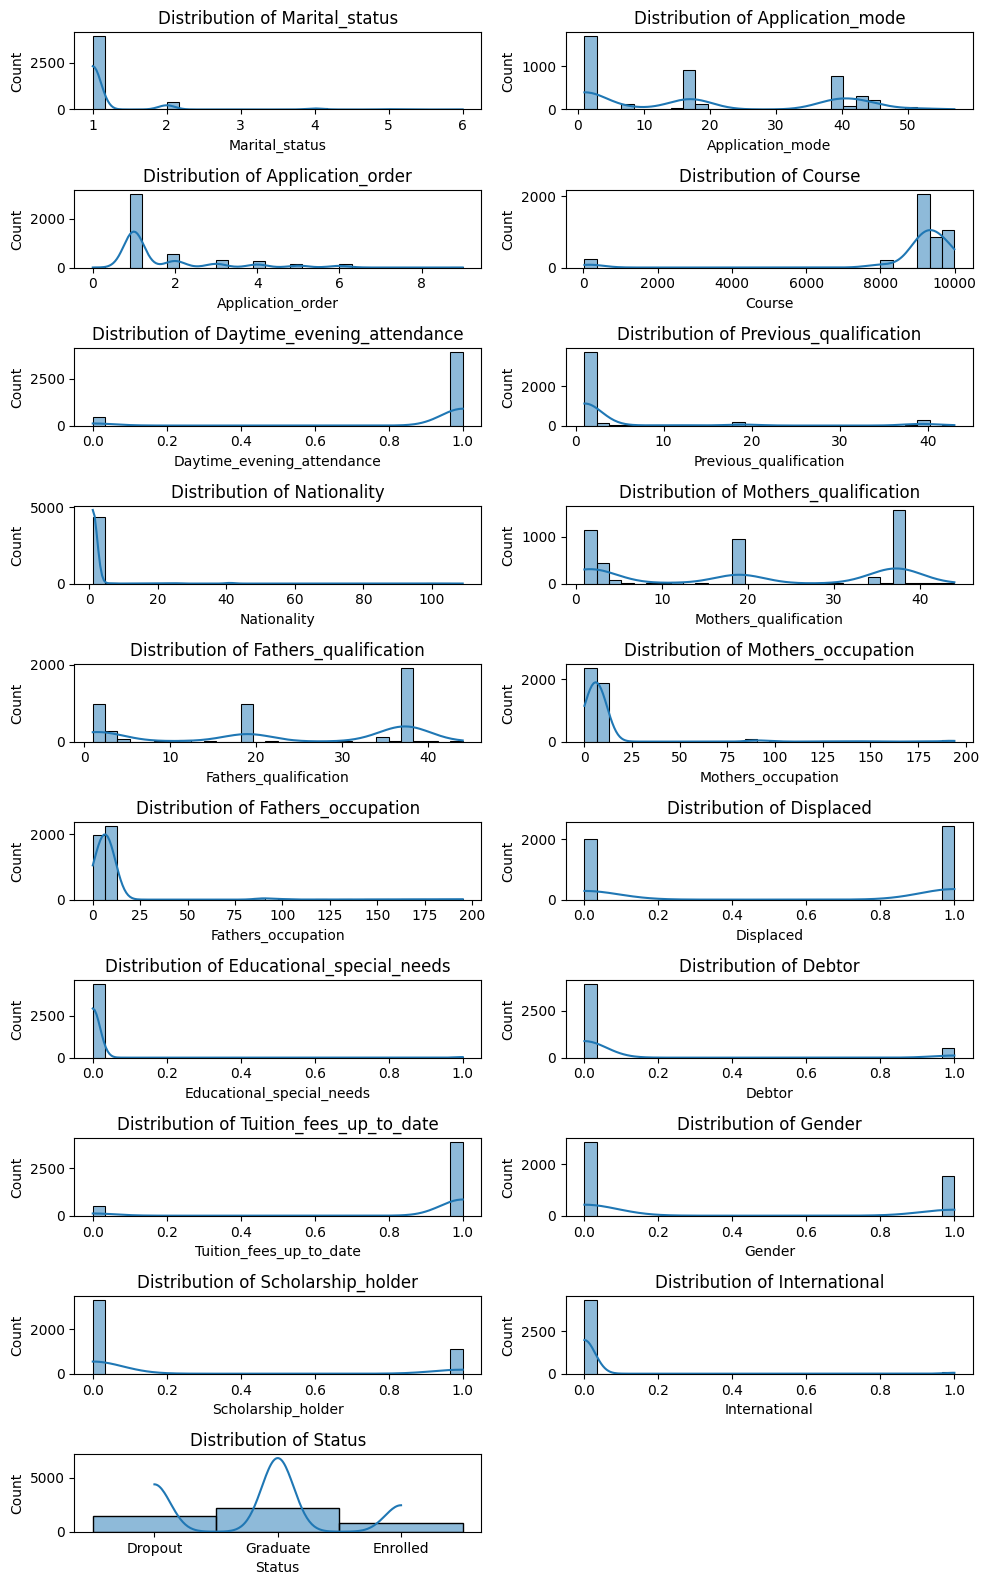

In [ ]:
# Distribusi Fitur Kategorikal
plt.figure(figsize=(10,25))
for i, column in enumerate(categorical_features.columns, 1):
    plt.subplot(16, 2, i)
    sns.histplot(df_clean[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()

In [ ]:
correlation_matrix = numerical_features.corr()

Text(0.5, 1.0, "Heatmap of Numerical Features' Correlation")

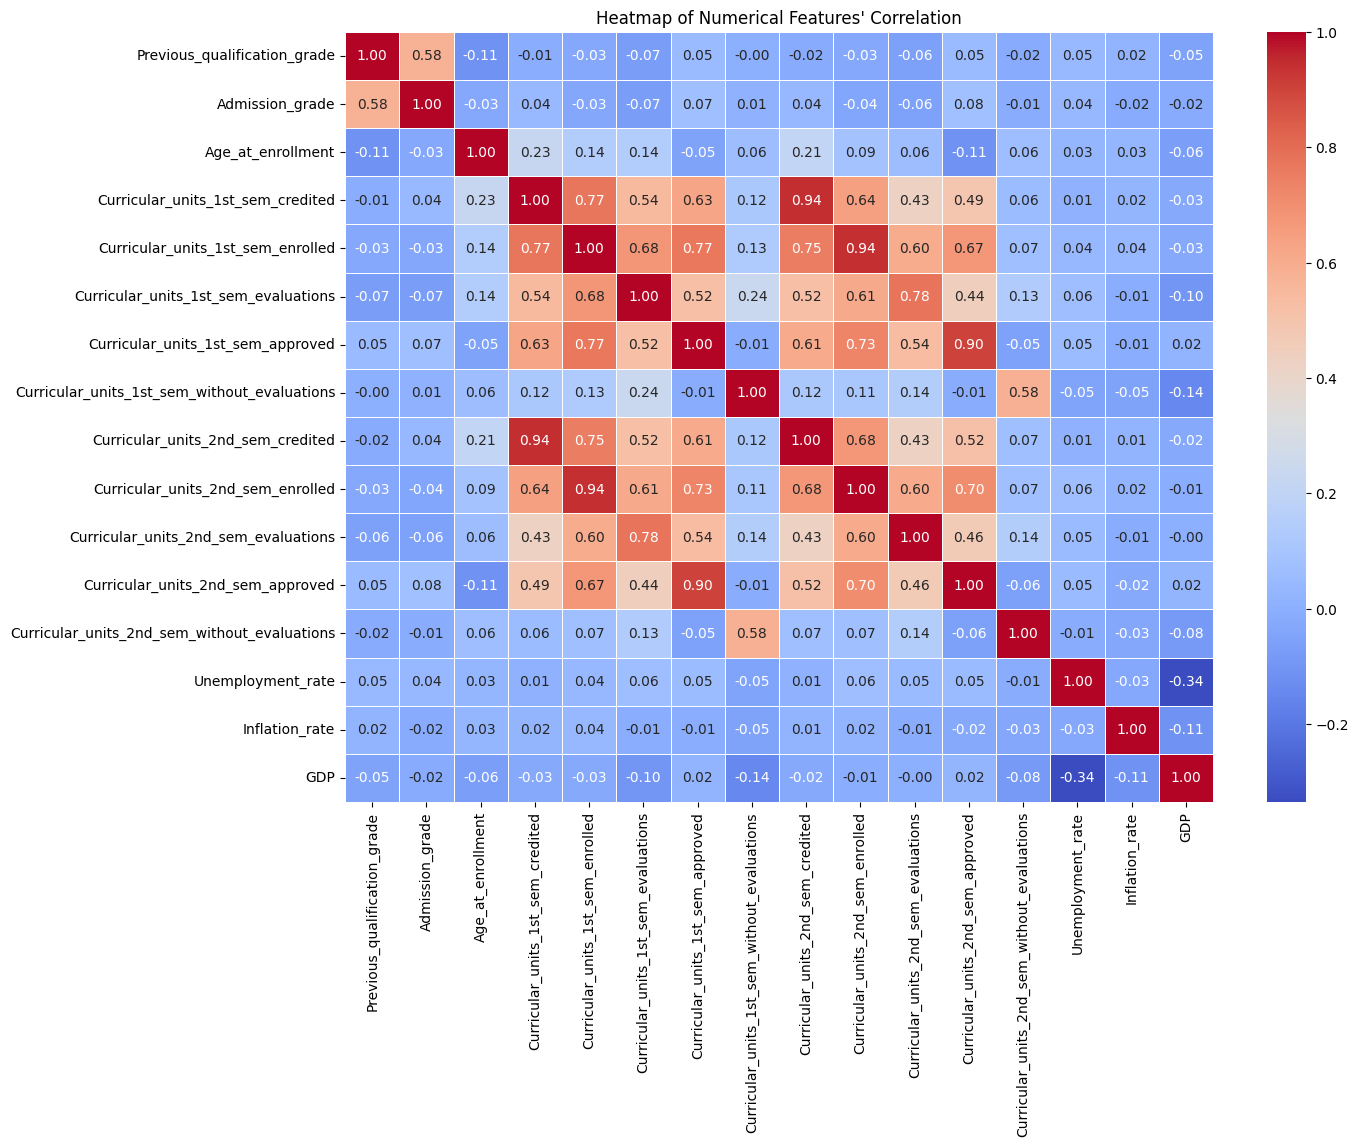

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Numerical Features' Correlation")

In [ ]:
# Cari nilai korelasi yang lebih dari 0.7 atau kurang dari -0.7
hi_corr = correlation_matrix[((correlation_matrix > 0.7) | (correlation_matrix < -0.7)) & (correlation_matrix != 1.0)]
hi_corr_pairs = hi_corr.stack().reset_index()
hi_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
hi_corr_pairs = hi_corr_pairs[hi_corr_pairs['Feature1'] != hi_corr_pairs['Feature2']]

print(hi_corr_pairs)

                                Feature1  \
0      Curricular_units_1st_sem_credited   
1      Curricular_units_1st_sem_credited   
2      Curricular_units_1st_sem_enrolled   
3      Curricular_units_1st_sem_enrolled   
4      Curricular_units_1st_sem_enrolled   
5      Curricular_units_1st_sem_enrolled   
6   Curricular_units_1st_sem_evaluations   
7      Curricular_units_1st_sem_approved   
8      Curricular_units_1st_sem_approved   
9      Curricular_units_1st_sem_approved   
10     Curricular_units_2nd_sem_credited   
11     Curricular_units_2nd_sem_credited   
12     Curricular_units_2nd_sem_enrolled   
13     Curricular_units_2nd_sem_enrolled   
14     Curricular_units_2nd_sem_enrolled   
15  Curricular_units_2nd_sem_evaluations   
16     Curricular_units_2nd_sem_approved   
17     Curricular_units_2nd_sem_approved   

                                Feature2  Correlation  
0      Curricular_units_1st_sem_enrolled     0.774344  
1      Curricular_units_2nd_sem_credited     0.9448

Pada DataFrame di atas dapat diketahui fitur-fitur tersebut memiliki korelasi yang tinggi. Namun jika dianalisis lebih dalam, fitur-fitur di atas sebenarnya mengandung informasi yang mirip, sehingga dapat menyebabkan multikolinearitas dalam model.

Terdapat 2 solusi, yakni:
1. Memilih salah satu fitur yang berkorelasi.
1. Mengurangi dimensi data dengan PCA.

Pada kasus ini, saya memutuskan untuk drop salah satu fitur yang berkorelasi.

In [ ]:
df_clean = df_clean.drop(columns=['Curricular_units_1st_sem_credited','Curricular_units_1st_sem_evaluations','Curricular_units_1st_sem_without_evaluations','Curricular_units_1st_sem_approved','Curricular_units_2nd_sem_credited','Curricular_units_2nd_sem_evaluations','Curricular_units_2nd_sem_without_evaluations','Curricular_units_2nd_sem_approved'])

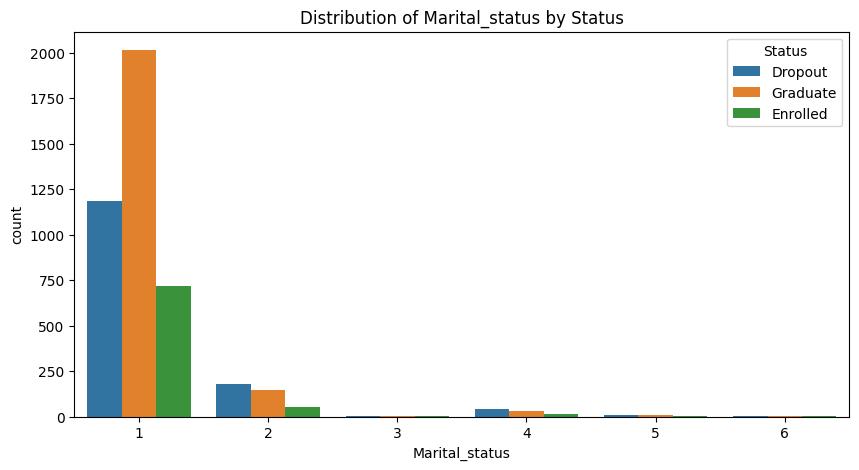

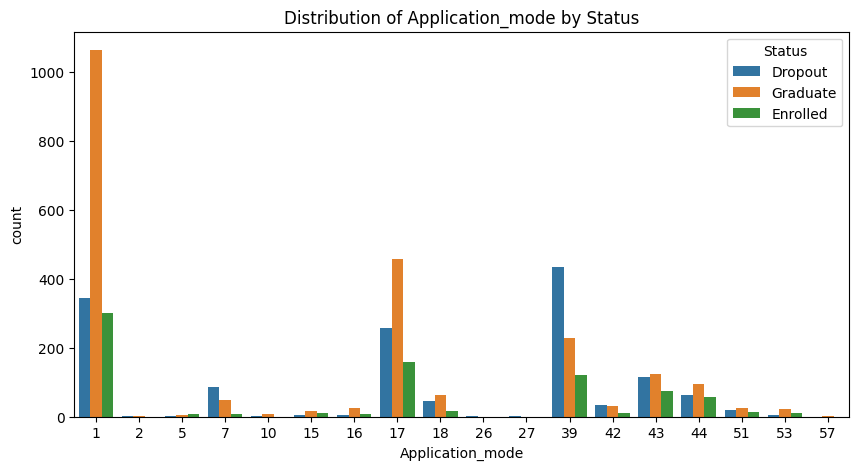

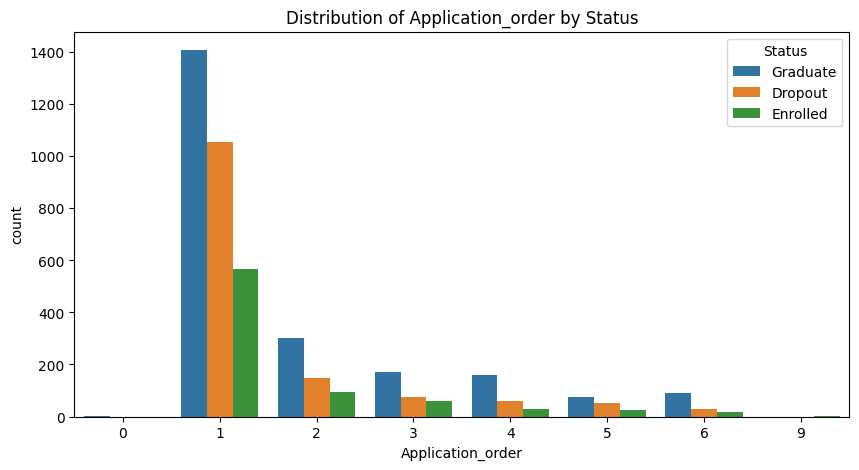

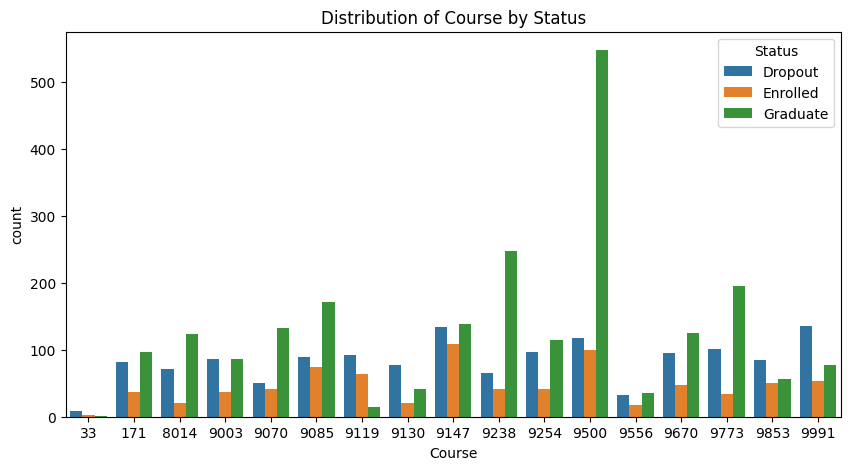

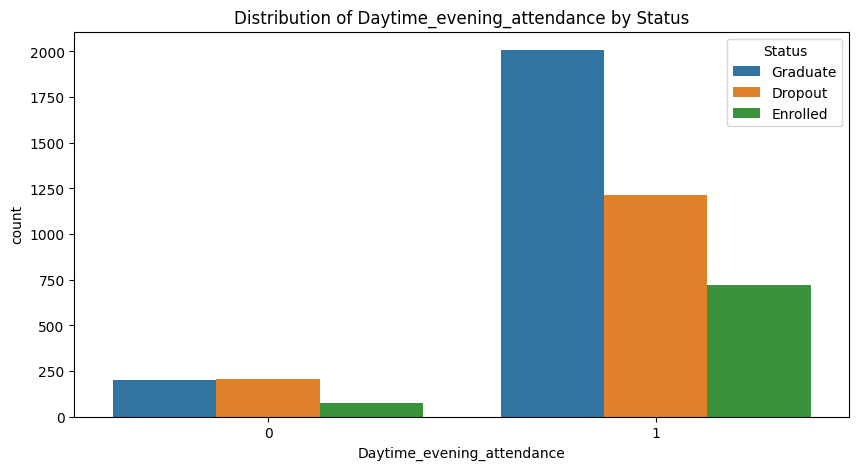

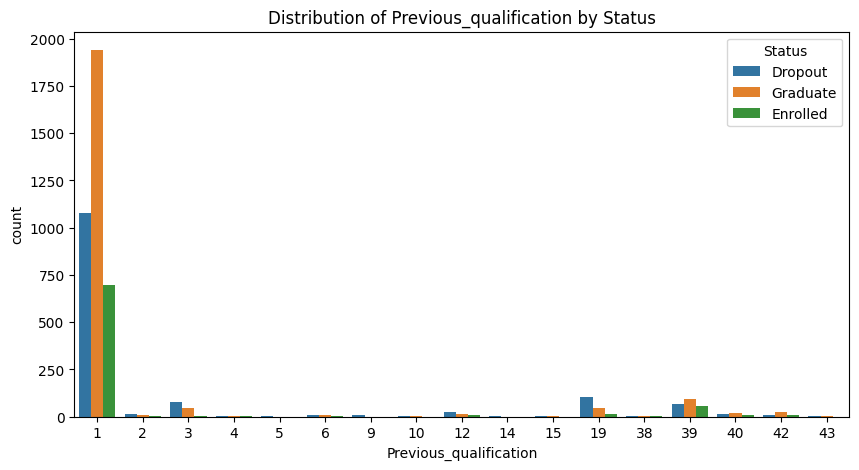

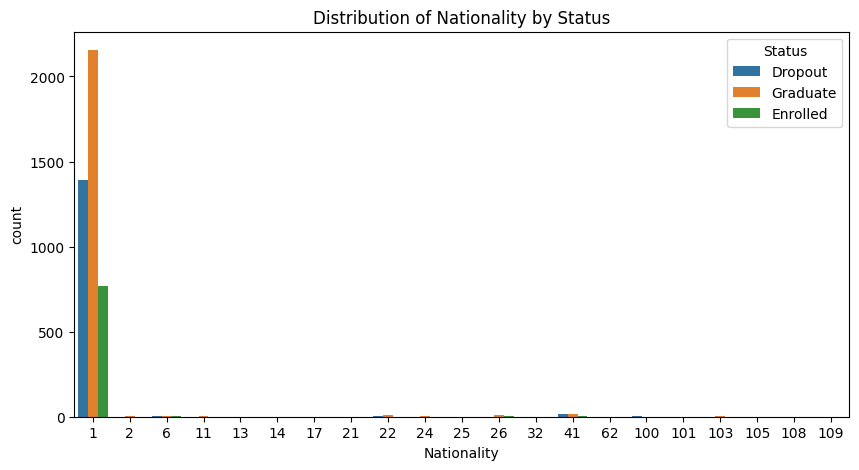

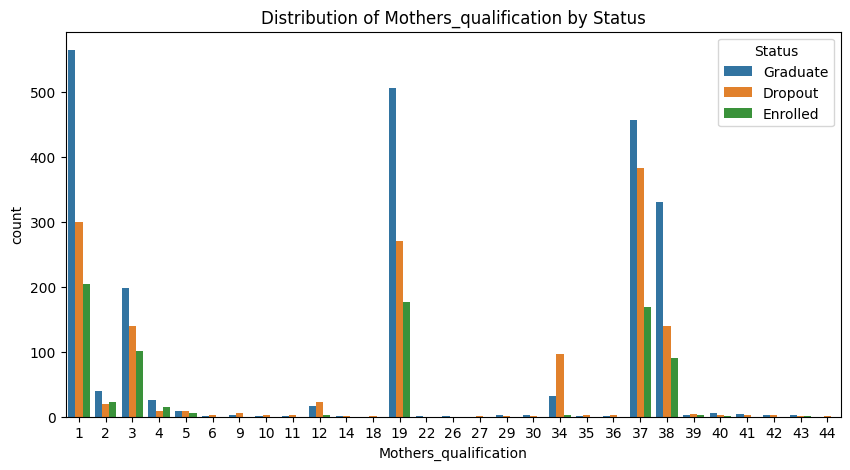

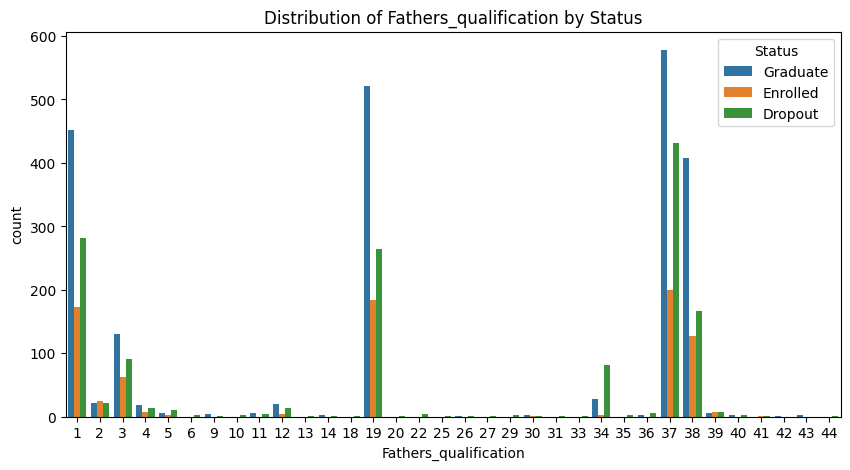

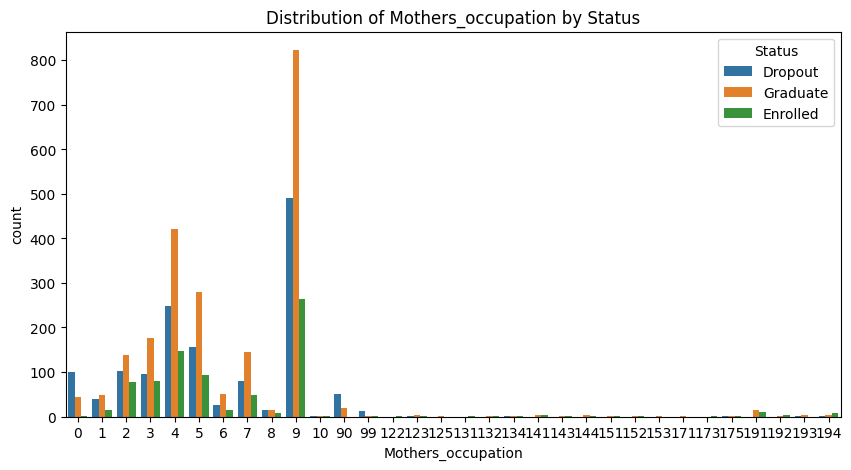

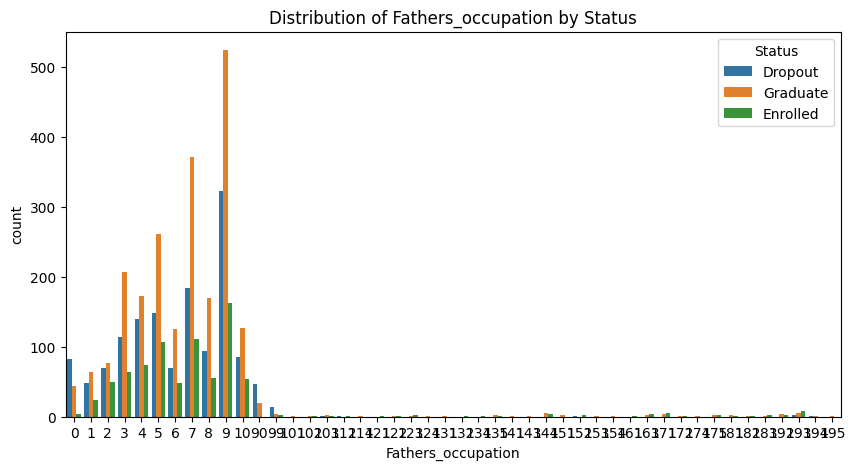

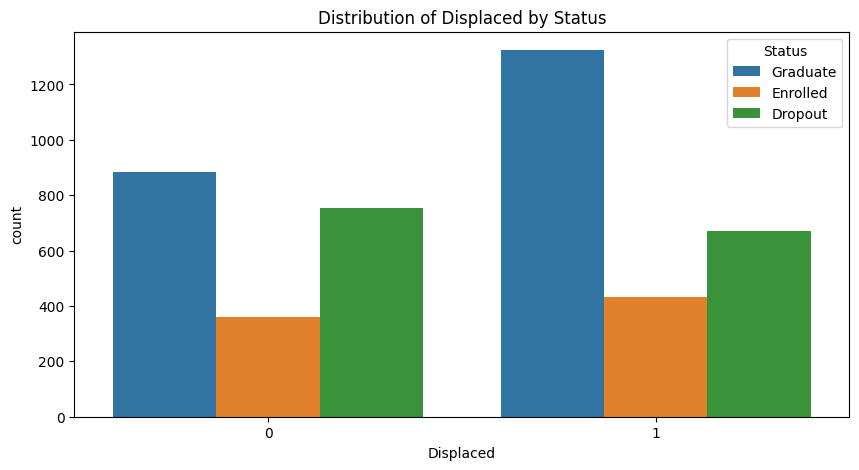

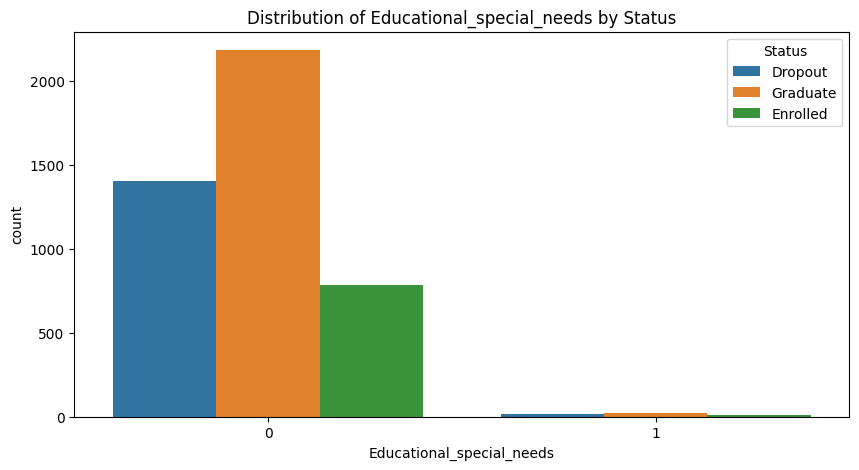

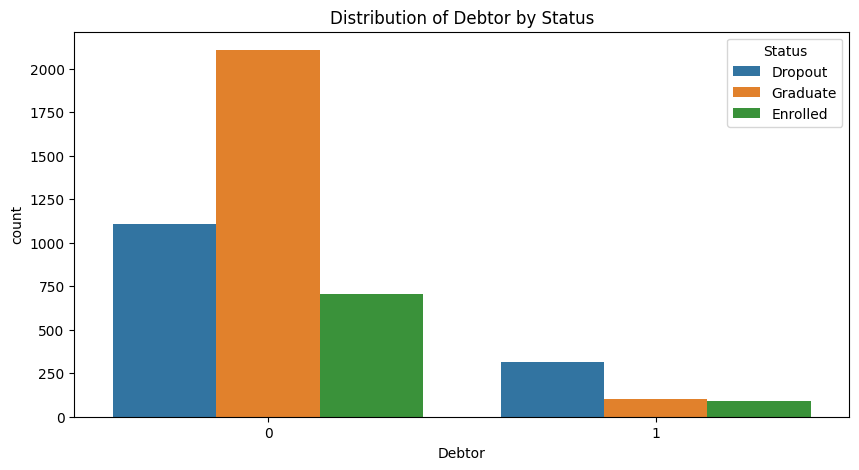

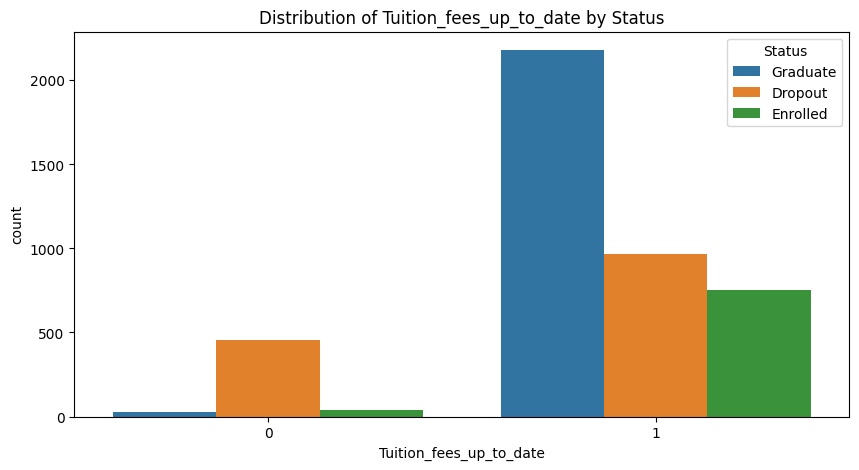

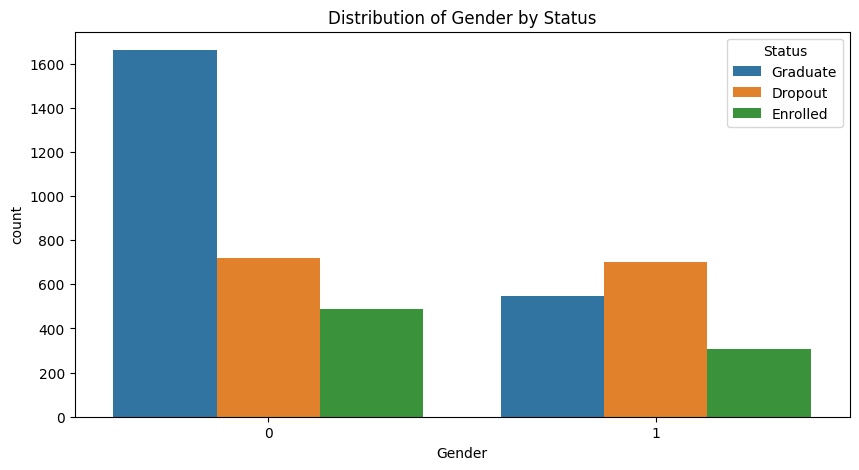

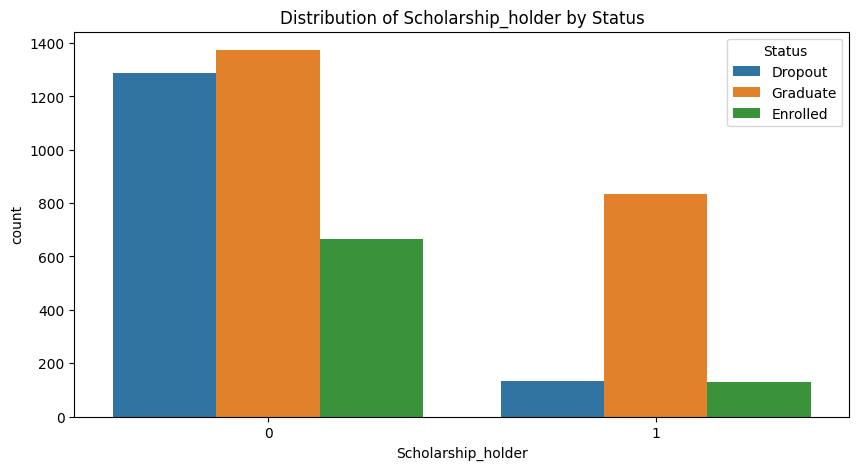

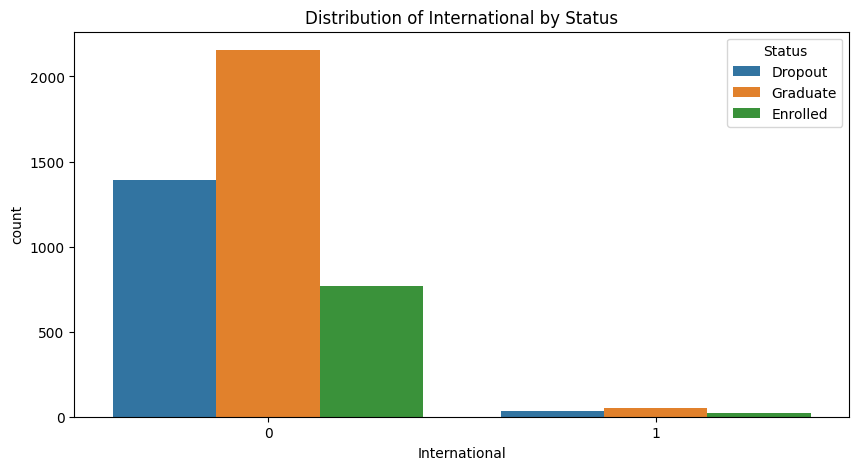

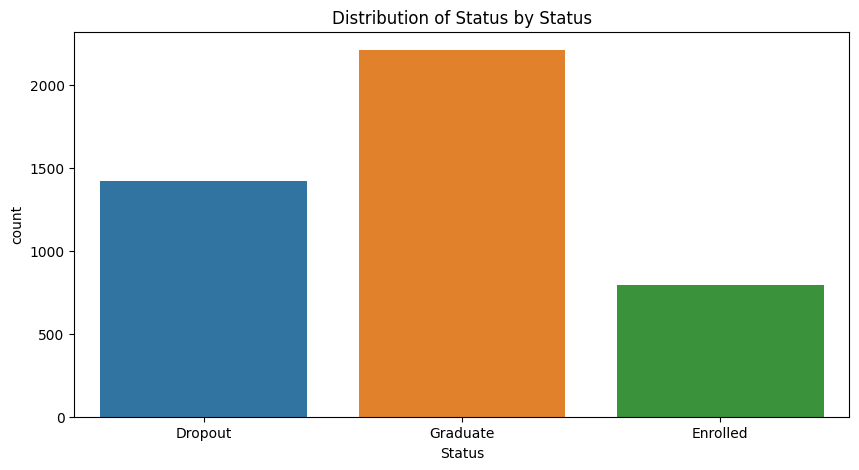

In [ ]:
for column in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, hue='Status', data=df_clean)
    plt.title(f'Distribution of {column} by Status')

In [ ]:
for column in categorical_features:
    print(f"\nDistribution of Status by {column}")
    distribution = pd.crosstab(df_clean[column], df_clean['Status'], margins=True, normalize='index') * 100
    display(distribution.round())


Distribution of Status by Marital_status


Status,Dropout,Enrolled,Graduate
Marital_status,,,
1,30.0,18.0,51.0
2,47.0,14.0,39.0
3,25.0,50.0,25.0
4,46.0,18.0,36.0
5,44.0,12.0,44.0
6,67.0,17.0,17.0
All,32.0,18.0,50.0



Distribution of Status by Application_mode


Status,Dropout,Enrolled,Graduate
Application_mode,,,
1,20.0,18.0,62.0
2,67.0,0.0,33.0
5,12.0,50.0,38.0
7,61.0,5.0,34.0
10,30.0,0.0,70.0
15,17.0,33.0,50.0
16,13.0,21.0,66.0
17,29.0,18.0,52.0
18,36.0,13.0,51.0



Distribution of Status by Application_order


Status,Dropout,Enrolled,Graduate
Application_order,,,
0,0.0,0.0,100.0
1,35.0,19.0,47.0
2,27.0,18.0,55.0
3,25.0,19.0,56.0
4,23.0,12.0,64.0
5,34.0,16.0,49.0
6,23.0,12.0,66.0
9,0.0,100.0,0.0
All,32.0,18.0,50.0



Distribution of Status by Course


Status,Dropout,Enrolled,Graduate
Course,,,
33,67.0,25.0,8.0
171,38.0,17.0,45.0
8014,33.0,10.0,57.0
9003,41.0,18.0,41.0
9070,23.0,19.0,59.0
9085,27.0,22.0,51.0
9119,54.0,38.0,8.0
9130,55.0,15.0,30.0
9147,35.0,28.0,36.0



Distribution of Status by Daytime_evening_attendance


Status,Dropout,Enrolled,Graduate
Daytime_evening_attendance,,,
0,43.0,16.0,42.0
1,31.0,18.0,51.0
All,32.0,18.0,50.0



Distribution of Status by Previous_qualification


Status,Dropout,Enrolled,Graduate
Previous_qualification,,,
1,29.0,19.0,52.0
2,70.0,4.0,26.0
3,60.0,3.0,37.0
4,50.0,12.0,38.0
5,100.0,0.0,0.0
6,44.0,6.0,50.0
9,100.0,0.0,0.0
10,75.0,0.0,25.0
12,58.0,13.0,29.0



Distribution of Status by Nationality


Status,Dropout,Enrolled,Graduate
Nationality,,,
1,32.0,18.0,50.0
2,0.0,0.0,100.0
6,31.0,38.0,31.0
11,0.0,0.0,100.0
13,0.0,0.0,100.0
14,0.0,0.0,100.0
17,100.0,0.0,0.0
21,50.0,50.0,0.0
22,31.0,8.0,62.0



Distribution of Status by Mothers_qualification


Status,Dropout,Enrolled,Graduate
Mothers_qualification,,,
1,28.0,19.0,53.0
2,24.0,28.0,48.0
3,32.0,23.0,45.0
4,16.0,31.0,53.0
5,38.0,24.0,38.0
6,75.0,0.0,25.0
9,62.0,0.0,38.0
10,67.0,0.0,33.0
11,67.0,0.0,33.0



Distribution of Status by Fathers_qualification


Status,Dropout,Enrolled,Graduate
Fathers_qualification,,,
1,31.0,19.0,50.0
2,32.0,37.0,31.0
3,32.0,22.0,46.0
4,36.0,18.0,46.0
5,56.0,17.0,28.0
6,100.0,0.0,0.0
9,20.0,0.0,80.0
10,100.0,0.0,0.0
11,40.0,0.0,60.0



Distribution of Status by Mothers_occupation


Status,Dropout,Enrolled,Graduate
Mothers_occupation,,,
0,69.0,1.0,31.0
1,38.0,15.0,47.0
2,32.0,25.0,43.0
3,27.0,23.0,50.0
4,30.0,18.0,52.0
5,29.0,18.0,53.0
6,29.0,15.0,56.0
7,29.0,18.0,53.0
8,42.0,19.0,39.0



Distribution of Status by Fathers_occupation


Status,Dropout,Enrolled,Graduate
Fathers_occupation,,,
0,64.0,2.0,34.0
1,36.0,17.0,47.0
2,36.0,25.0,39.0
3,30.0,16.0,54.0
4,36.0,19.0,45.0
5,29.0,21.0,51.0
6,29.0,20.0,52.0
7,28.0,17.0,56.0
8,30.0,17.0,53.0



Distribution of Status by Displaced


Status,Dropout,Enrolled,Graduate
Displaced,,,
0,38.0,18.0,44.0
1,28.0,18.0,55.0
All,32.0,18.0,50.0



Distribution of Status by Educational_special_needs


Status,Dropout,Enrolled,Graduate
Educational_special_needs,,,
0,32.0,18.0,50.0
1,33.0,22.0,45.0
All,32.0,18.0,50.0



Distribution of Status by Debtor


Status,Dropout,Enrolled,Graduate
Debtor,,,
0,28.0,18.0,54.0
1,62.0,18.0,20.0
All,32.0,18.0,50.0



Distribution of Status by Tuition_fees_up_to_date


Status,Dropout,Enrolled,Graduate
Tuition_fees_up_to_date,,,
0,87.0,8.0,5.0
1,25.0,19.0,56.0
All,32.0,18.0,50.0



Distribution of Status by Gender


Status,Dropout,Enrolled,Graduate
Gender,,,
0,25.0,17.0,58.0
1,45.0,20.0,35.0
All,32.0,18.0,50.0



Distribution of Status by Scholarship_holder


Status,Dropout,Enrolled,Graduate
Scholarship_holder,,,
0,39.0,20.0,41.0
1,12.0,12.0,76.0
All,32.0,18.0,50.0



Distribution of Status by International


Status,Dropout,Enrolled,Graduate
International,,,
0,32.0,18.0,50.0
1,29.0,22.0,49.0
All,32.0,18.0,50.0



Distribution of Status by Status


Status,Dropout,Enrolled,Graduate
Status,,,
Dropout,100.0,0.0,0.0
Enrolled,0.0,100.0,0.0
Graduate,0.0,0.0,100.0
All,32.0,18.0,50.0


1. Sebanyak 32% mahasiswa memutuskan dropout.
1. Sebanyak 12% mahasiswa penerima beasiswa mengalami dropout.
1. Sebanyak 45% mahasiswa berjenis kelamin laki-laki mengalami dropout.
1. `Mothers_qualification`: 6, 9, 10, 11, 27, 34, 35 memiliki dropout tinggi (>60%-100%).
1. `Fathers_qualification`: 6, 10, 13, 18, 20, 22, 25, 27, 29 memiliki 100% dropout.
1. Sebanyak 69% mahasiswa dropout memiliki `Mothers_occupation=0`.
1. Sebanyak 50% mahasiswa dropout memiliki usia 18-19 tahun saat masuk kuliah.
1. Sebanyak 30% mahasiswa dropout mengambil program studi management dan nursing.
1. Sebanyak 50% mahasiswa dropout memiliki usia 23 tahun saat mendaftar kuliah.
1. Sebanyak 25% mahasiswa dropout memiliki skor grade 133 pada tingkat pendidikan sebelumnya.

Beberapa fitur menunjukkan ketimpangan data sehingga tidak dapat diambil informasinya sehingga akan dihapus karena tidak ditemukan adanya pola, seperti: `Marital_status`, `Application_order`, `Previous_qualification`, `Nationality`, `Educational_special_needs`, `International`.

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Marital_status                     4424 non-null   object 
 1   Application_mode                   4424 non-null   object 
 2   Application_order                  4424 non-null   object 
 3   Course                             4424 non-null   object 
 4   Daytime_evening_attendance         4424 non-null   object 
 5   Previous_qualification             4424 non-null   object 
 6   Previous_qualification_grade       4424 non-null   float64
 7   Nationality                        4424 non-null   object 
 8   Mothers_qualification              4424 non-null   object 
 9   Fathers_qualification              4424 non-null   object 
 10  Mothers_occupation                 4424 non-null   object 
 11  Fathers_occupation                 4424 non-null   objec

In [ ]:
df_clean = df_clean.drop(columns=['Application_order','Previous_qualification','Nationality','Educational_special_needs','International'])

#### **Mengganti Nilai pada Kolom Target**

In [ ]:
df_clean['Status'].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


In [ ]:
df_clean['Status'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [ ]:
df_clean['Status'] = df_clean['Status'].apply(lambda x: 1 if x == 'Dropout' else 0)

In [ ]:
df_clean['Status'].value_counts()

,count
Status,
0,3003
1,1421


#### **Undersampling**

In [ ]:
df_majority = df_clean[df_clean['Status'] == 0]
df_minority = df_clean[df_clean['Status'] == 1]

In [ ]:
df_majority_undersampled = resample(
    df_majority,
    replace=False,
    n_samples=len(df_minority),
    random_state=42
)

In [ ]:
df_undersampled = pd.concat([df_majority_undersampled, df_minority])

In [ ]:
df_undersampled['Status'].value_counts()

,count
Status,
0,1421
1,1421


#### **Data Splitting**

In [ ]:
X = df_undersampled.drop(columns='Status')
y = df_undersampled['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2273, 21), (569, 21), (2273,), (569,))

#### **Scaling & Encoding**

In [ ]:
df_undersampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2842 entries, 3196 to 4421
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Marital_status                     2842 non-null   object 
 1   Application_mode                   2842 non-null   object 
 2   Course                             2842 non-null   object 
 3   Daytime_evening_attendance         2842 non-null   object 
 4   Previous_qualification_grade       2842 non-null   float64
 5   Mothers_qualification              2842 non-null   object 
 6   Fathers_qualification              2842 non-null   object 
 7   Mothers_occupation                 2842 non-null   object 
 8   Fathers_occupation                 2842 non-null   object 
 9   Admission_grade                    2842 non-null   float64
 10  Displaced                          2842 non-null   object 
 11  Debtor                             2842 non-null   object 

In [ ]:
X_train['Fathers_occupation'].unique()

array([7, 6, 10, 9, 1, 0, 4, 5, 8, 171, 3, 182, 2, 90, 123, 154, 193, 195,
       134, 103, 99, 144, 194, 102, 143, 192, 131, 163, 132, 112, 175,
       174, 135, 151, 161, 124, 152], dtype=object)

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
transforming_categorical_features = X.select_dtypes(include=['object']).columns.to_list()
transforming_numerical_features = X.select_dtypes(include=['number']).columns.to_list()

In [ ]:
transforming_categorical_features

['Marital_status',
 'Application_mode',
 'Course',
 'Daytime_evening_attendance',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Displaced',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder']

In [ ]:
transforming_numerical_features

['Previous_qualification_grade',
 'Admission_grade',
 'Age_at_enrollment',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_2nd_sem_enrolled',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP']

In [ ]:
encoder = OrdinalEncoder()
scaler = StandardScaler()
preprocessor = ColumnTransformer([
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), transforming_categorical_features),
    ('num', StandardScaler(), transforming_numerical_features)
])

## Modeling

In [ ]:
model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Marital_status',
                                                   'Application_mode', 'Course',
                                                   'Daytime_evening_attendance',
                                                   'Mothers_qualification',
                                                   'Fathers_qualification',
                                                   'Mothers_occupation',
                                                   'Fathers_occupation',
                                                   'Displaced', 'Debtor',
                                                   'Tuition_fees_up_to_date',
                                                   'Gender',
                                                   'Scholarship_holder']),
                                                 ('num', StandardScaler(),
                                                  ['Previous_qualification_grade',
                                                   'Admission_grade',
                                                   'Age_at_enrollment',
                                                   'Curricular_units_1st_sem_enrolled',
                                                   'Curricular_units_2nd_sem_enrolled',
                                                   'Unemployment_rate',
                                                   'Inflation_rate',
                                                   'GDP'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
X_train.head()

,Marital_status,Application_mode,Course,Daytime_evening_attendance,Previous_qualification_grade,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,...,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_2nd_sem_enrolled,Unemployment_rate,Inflation_rate,GDP
2770,1,17,9556,1,134.0,19,38,7,7,128.5,...,0,1,0,1,18,7,8,12.7,3.7,-1.70
4314,1,17,9119,1,132.0,37,37,9,6,119.4,...,0,1,1,0,21,5,5,7.6,2.6,0.32
2559,1,1,9773,1,156.0,19,1,5,10,136.8,...,0,1,0,0,18,6,6,11.1,0.6,2.02
3887,1,1,9238,1,108.0,19,38,9,9,107.3,...,0,1,0,1,19,6,6,12.4,0.5,1.79
1800,1,1,9500,1,139.0,3,1,4,1,126.0,...,0,1,1,0,18,8,8,10.8,1.4,1.74


In [ ]:
y_train.head()

,Status
2770,0
4314,1
2559,1
3887,0
1800,1


In [71]:
joblib.dump(model,'/content/drive/MyDrive/submission-data-science-2/model.pkl')

['/content/drive/MyDrive/submission-data-science-2/model.pkl']

## Evaluation

In [73]:
y_prediction = model.predict(X_test)

print(classification_report(y_test, y_prediction))
print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74       287
           1       0.75      0.64      0.69       282

    accuracy                           0.72       569
   macro avg       0.72      0.72      0.72       569
weighted avg       0.72      0.72      0.72       569

ROC AUC: 0.7943447747547384


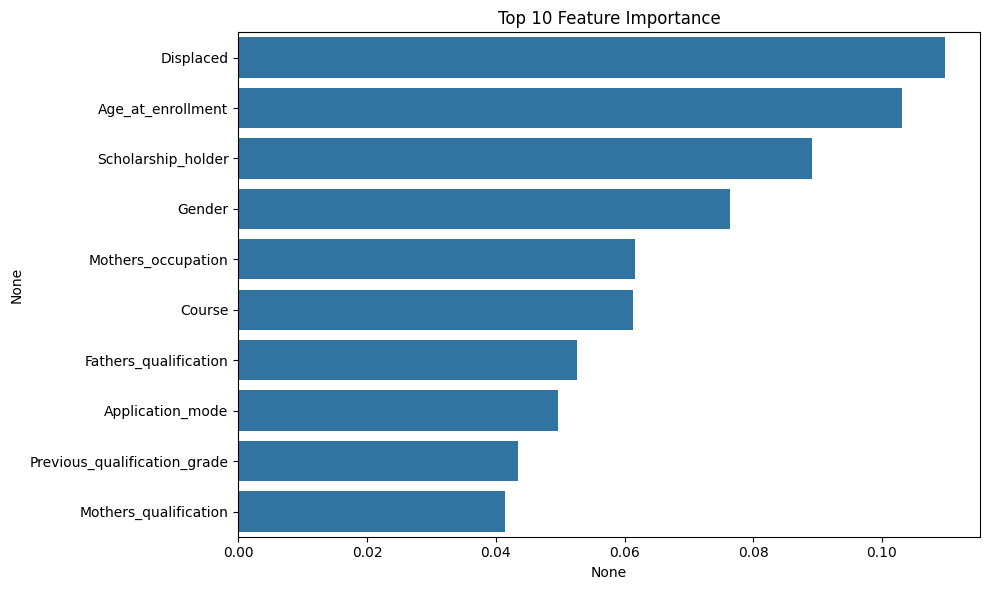

In [74]:
importances = model.named_steps['classifier'].feature_importances_
feat_names = X.columns
feat_importance = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance[:10], y=feat_importance.index[:10])
plt.title("Top 10 Feature Importance")
plt.tight_layout()

Berdasarkan hasil dari modelling untuk prediksi dropout, 10 fitur berikut memiliki tingkat kepentingan tertinggi terhadap akurasi prediksi model. Hal tersebut menunjukkan bahwa fitur-fitur tersebut secara statistik paling banyak digunakan oleh model dalam menentukan apakah seorang siswa beresiko dropout. Namun catatan penting bahwa ini adalah asosiasi statistik dan mungkin bukan penyebab langsung.

In [75]:
df.to_csv('/content/drive/MyDrive/submission-data-science-2/df_final.csv', index=False)